In [1]:
import numpy as np
import matplotlib.pyplot as plt
from UQ_in_ML.Epistemic_Regressor1D import *
from UQ_in_ML.general_utils import *
import keras.backend as K
from functools import partial

ModuleNotFoundError: No module named 'UQ_in_ML.Epistemic_Regressor1D'

## Plot relationship between std. dev. sigma and parameter rho

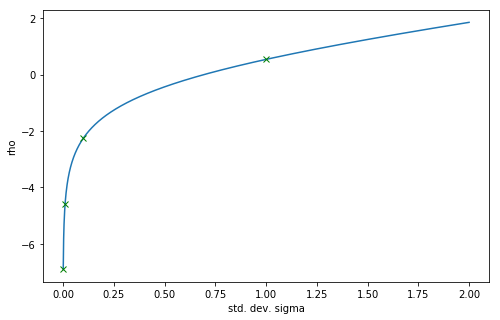

In [2]:
xx = np.linspace(0.001, 2, 2000)
yy = np.log(np.exp(xx)-1)
xx_2 = [0.001, 0.01, 0.1, 1]
yy_2 = np.log(np.exp(xx_2)-1)
fig, ax = plt.subplots(figsize = (8, 5))
ax.plot(xx, yy)
ax.plot(xx_2, yy_2, linestyle='none', marker='x', color='green')
ax.set_xlabel('std. dev. sigma')
ax.set_ylabel('rho')
plt.show(fig)

In [3]:
def set_problem(problem, n_data):
    if problem == 'cubic':
        var_n = 9.
        f = partial(f_cubic, var_n=var_n)
        xn = np.random.uniform(low=-4.5, high=4.5, size=(n_data,1))
        bounds = (-6, 6)
        units_per_layer=(14, 14, 14, 14,)
        prior = {'type': 'gaussian', 'variance': [2.]*len(units_per_layer)+[0.02]}
    elif problem == 'sin_cos':
        var_n = 0.05**2
        f = partial(f_sin_cos, var_n=var_n)
        bounds = (0, 10)
        xn = np.random.uniform(low=bounds[0], high=bounds[1], size=(n_data,1))
        units_per_layer=(14, 14, 14, 14,)
        prior = {'type': 'gaussian', 'variance': [2.]*len(units_per_layer)+[0.02]}
    elif problem == 'last':
        var_n = 0.02**2
        f = partial(g_homoscedastic, var_n=var_n)
        xn = np.random.uniform(low=0., high=0.5, size=(n_data,1))
        bounds = (-0.2, 1.2)
        units_per_layer=(14, 14, 14, 14,)
        prior = {'type': 'gaussian', 'variance': [1.]*len(units_per_layer)+[0.05]}
    yn = f(xn, noisy=True)
    x_plot = np.linspace(bounds[0], bounds[1], 100).reshape((-1,1))
    fig, ax = plt.subplots(ncols=1, figsize=(6, 4))
    y_plot = f(x_plot, noisy=False)
    ax.plot(x_plot, y_plot, color='green', label='true', alpha=0.5)
    ax.plot(xn, yn, color='blue', marker='.', linestyle='none', label='data')
    plt.legend()
    plt.show()
    return f, var_n, bounds, xn, yn, x_plot, y_plot, units_per_layer, prior

def plot_regressor(reg, x_plot, y_plot, xn, yn, ax, title):
    plot_UQ(reg, X=x_plot, ax=ax, plot_one_posterior=True)
    ax.plot(xn, yn, linestyle='none',marker='.',label='data')
    ax.legend()
    ax.set_title(title)

# Look at problem with extrapolation

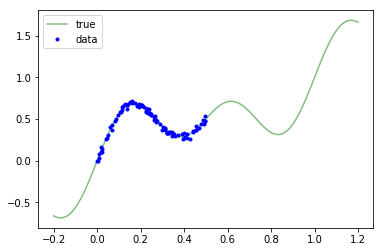

In [4]:
# Choose the problem, and the network architecture
problem = 'last' #'cubic' or 'sin_cos'
n_data = 100
f, var_n, bounds, xn, yn, x_plot, y_plot, units_per_layer, prior = set_problem(problem, n_data)
pre_model = build_scaling_layers(X_train = xn)

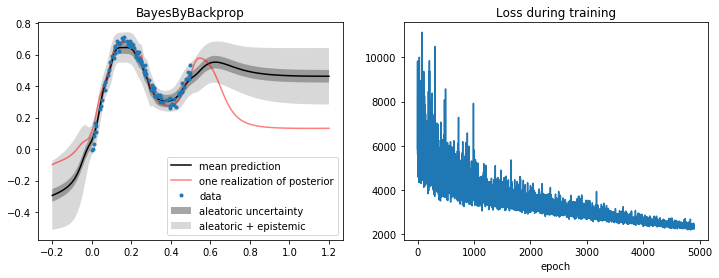

In [5]:
fig, ax = plt.subplots(ncols=2, figsize=(12, 4))
kwargs = {'var_n': var_n, 'units_per_layer':units_per_layer, 'prior': prior, 'pre_model': pre_model}
reg = BayesByBackprop(lr = 0.1, input_dim=1, **kwargs)
reg.fit(xn, yn, epochs=5000, n_samples=5)
plot_regressor(reg, x_plot, y_plot, xn, yn, ax[0], 'BayesByBackprop')
ax[1].plot(reg.loss_history[100:]); ax[1].set_title('Loss during training'); ax[1].set_xlabel('epoch')
plt.show(fig)

# Problem with interpolation

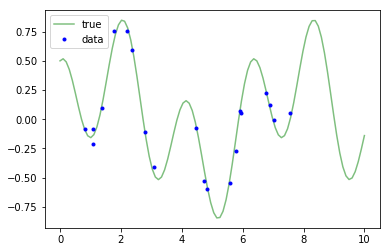

In [6]:
# Choose the problem, and the network architecture
problem = 'sin_cos' #'cubic' or 'sin_cos'
n_data = 20
f, var_n, bounds, xn, yn, x_plot, y_plot, units_per_layer, prior = set_problem(problem, n_data)
pre_model = build_scaling_layers(X_train = xn)
kwargs = {'var_n': var_n, 'units_per_layer':units_per_layer, 'prior': prior, 'pre_model': pre_model}

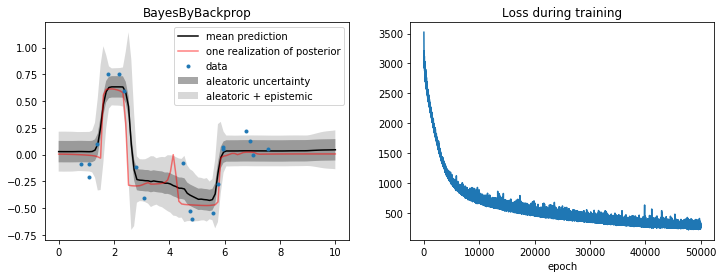

In [10]:
fig, ax = plt.subplots(ncols=2, figsize=(12, 4))
reg = BayesByBackprop(lr = 0.01, **kwargs)
reg.fit(xn, yn, epochs=50000, n_samples=5)
plot_regressor(reg, x_plot, y_plot, xn, yn, ax[0], 'BayesByBackprop')
ax[1].plot(reg.loss_history[10:]); ax[1].set_title('Loss during training'); ax[1].set_xlabel('epoch')
plt.show(fig)